In [ ]:
# # Import Needed Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the data
df=pd.read_csv('/content/survey lung cancer.csv')

In [ ]:
# read sample of data
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [ ]:
df.tail(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
# EDA

In [ ]:
df.shape

(309, 16)

In [ ]:
#checking datatypes
df.dtypes

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.describe(include="object")

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


This table gives you a summary of the columns in your dataset that contain text or categories (like 'GENDER' and 'LUNG_CANCER').

Here's what each part means:

    count: This tells you how many entries there are for each column. In this case, both 'GENDER' and 'LUNG_CANCER' have 309 entries.
    unique: This shows how many different types of values are in each column. Both 'GENDER' and 'LUNG_CANCER' have 2 unique values.
    top: This indicates the value that appears most often in each column. The most frequent gender is 'M' and the most frequent lung cancer result is 'YES'.
    freq: This is the number of times the 'top' value appears. 'M' appears 162 times and 'YES' appears 270 times.

That's a good observation about the describe() output! However, the freq value of 162 for 'M' in the 'GENDER' column only tells us that there are 162 males in the entire dataset. It doesn't specifically tell us how many of those males have lung cancer.

To find out the number of males with cancer, we would need to filter the dataset for males and then count how many of those have 'YES' in the 'LUNG_CANCER' column.
total number of persons with cancers are = 270

That's correct! The freq value of 270 for 'YES' in the 'LUNG_CANCER' column indicates that there are 270 persons with lung cancer in this dataset.

In [ ]:
df.columns.tolist()

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
# check repeated rows
df.duplicated().sum()

np.int64(33)

df.duplicated().sum(), tells you how many rows in your dataset are exact duplicates of other rows. The output np.int64(33) means there are 33 rows that are duplicates. You might want to consider removing these duplicate rows to avoid potential issues in your analysis or modeling.

In [ ]:
#remove repeated rows
df.drop_duplicates(inplace=True)
# check that removing is done
df.duplicated().sum()

np.int64(0)

In [ ]:
df['GENDER']=df['GENDER'].replace(['M', 'F'],[0,1])
df['LUNG_CANCER']=df['LUNG_CANCER'].replace(['YES', 'NO'],[1,0])

In [ ]:
# # target column
 #Patient has lung cancer = 1 , Patient not having lung cancer = 0
df['LUNG_CANCER'].unique()

array([1, 0])

In [ ]:
# Show value counts for each coluumn
coluumns =['GENDER', 'AGE', 'SMOKING','YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']


for col in coluumns:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for GENDER:
GENDER
0    142
1    134
Name: count, dtype: int64
Counts for AGE:
AGE
64    18
60    16
62    16
56    16
59    15
63    15
61    14
70    14
67    11
55    10
72    10
69    10
68     9
77     9
57     9
71     9
58     8
54     7
74     6
75     5
51     5
65     5
52     4
66     4
73     4
53     4
49     3
76     3
47     3
48     2
44     2
81     2
78     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64
Counts for SMOKING:
SMOKING
2    150
1    126
Name: count, dtype: int64
Counts for YELLOW_FINGERS:
YELLOW_FINGERS
2    159
1    117
Name: count, dtype: int64
Counts for ANXIETY:
ANXIETY
1    139
2    137
Name: count, dtype: int64
Counts for PEER_PRESSURE:
PEER_PRESSURE
2    140
1    136
Name: count, dtype: int64
Counts for CHRONIC DISEASE:
CHRONIC DISEASE
2    144
1    132
Name: count, dtype: int64
Counts for FATIGUE :
FATIGUE 
2    183
1     93
Name: count, dtype: int64
Counts for ALLERGY :
ALLERGY 
2    151
1    125
Name: cou

In [ ]:
# Data Visualization

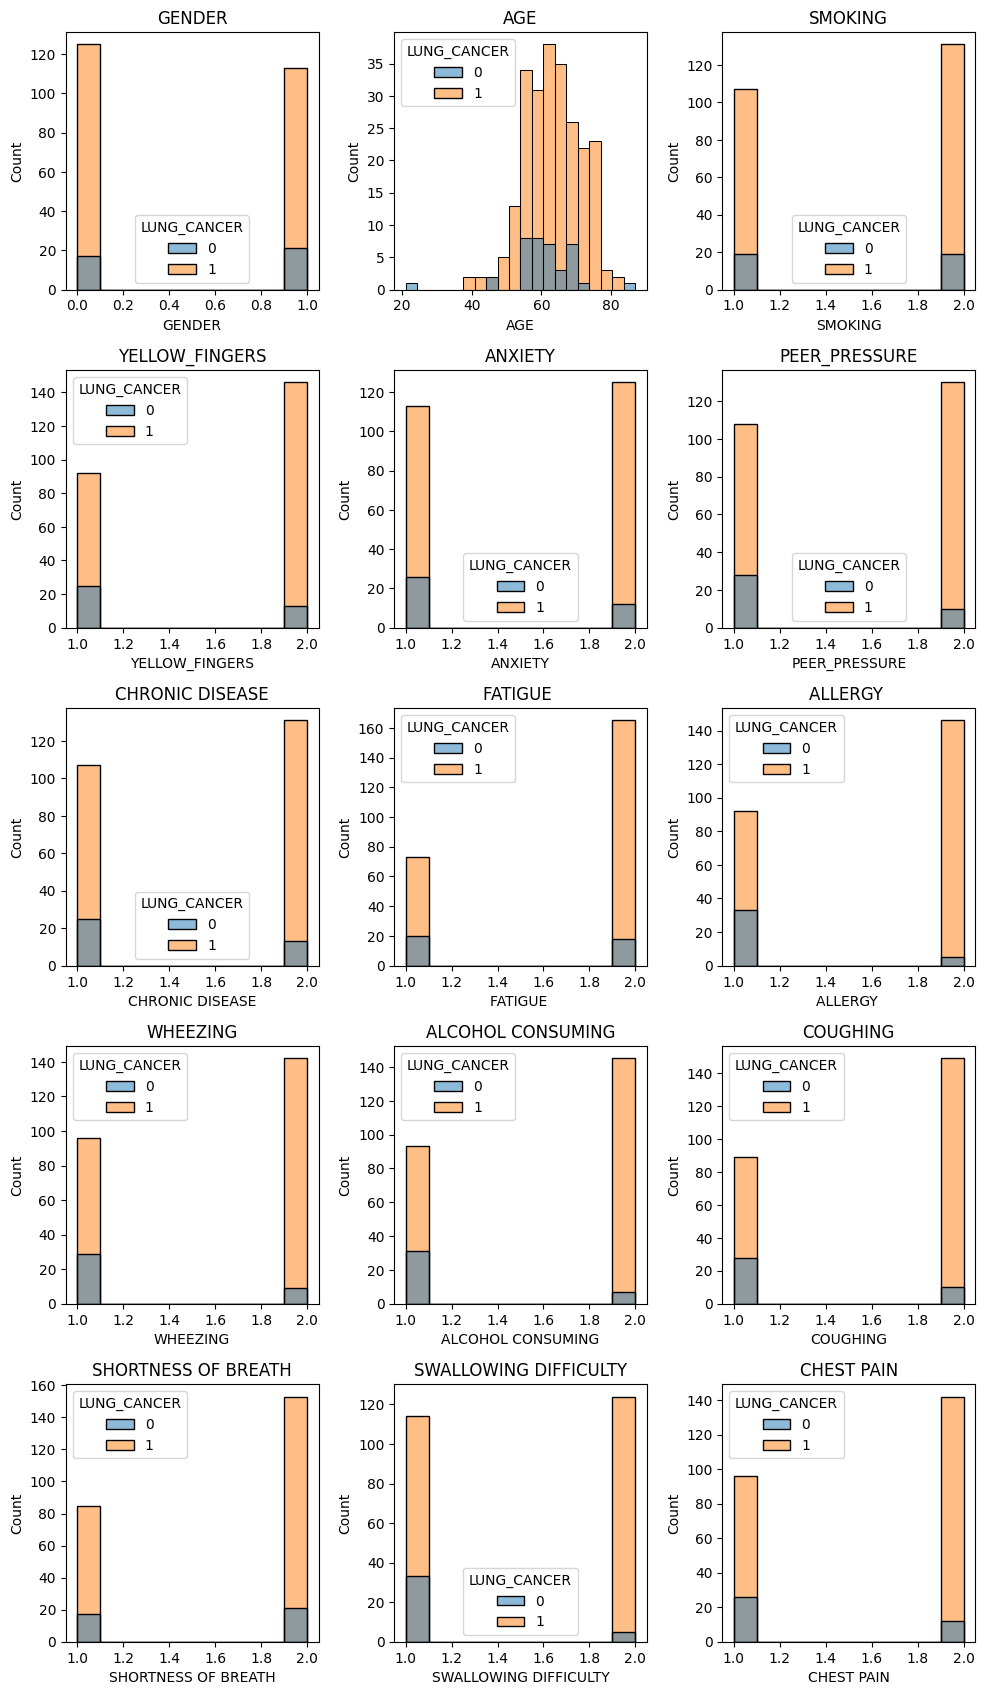

In [ ]:
# Distribution of numerical columns
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='LUNG_CANCER')

plt.tight_layout()

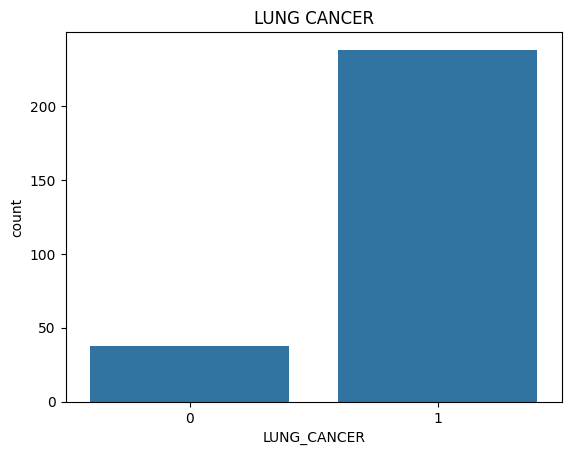

In [ ]:
#target column
sns.countplot(x=df['LUNG_CANCER'])
plt.title('LUNG CANCER');

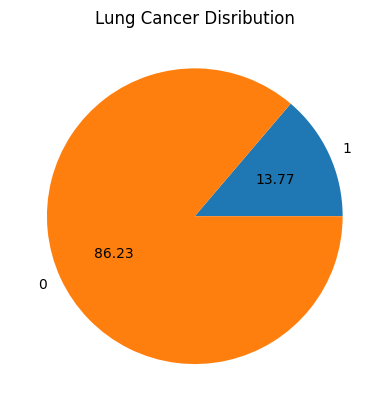

In [ ]:
#Another graph for "is_canceled" column
plt.pie(df.groupby(by=["LUNG_CANCER"]).size(), labels = df["LUNG_CANCER"].unique(), autopct = "%0.2f")
plt.title('Lung Cancer Disribution');
plt.show()



In the pie chart showing the distribution of LUNG_CANCER:

    The blue slice represents the instances where LUNG_CANCER is 1, which means the patient has lung cancer (as you mapped 'YES' to 1 earlier).
    The orange slice represents the instances where LUNG_CANCER is 0, which means the patient does not have lung cancer (as you mapped 'NO' to 0 earlier).



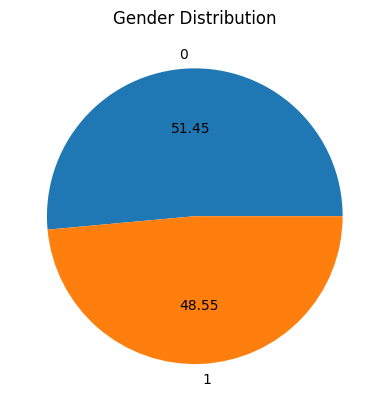

In [ ]:
# Gender Distribution
plt.pie(df.groupby(by=["GENDER"]).size(), labels = df["GENDER"].unique(), autopct = "%0.2f")
plt.title('Gender Distribution')
plt.show()

The pie chart in cell ZKhhvunX3Nh_ shows the distribution of the 'GENDER' column. Since you encoded 'M' as 0 and 'F' as 1:

    One slice represents the proportion of individuals in the dataset who are Male (represented by 0).
    The other slice represents the proportion of individuals in the dataset who are Female (represented by 1).


<Axes: xlabel='AGE', ylabel='Density'>

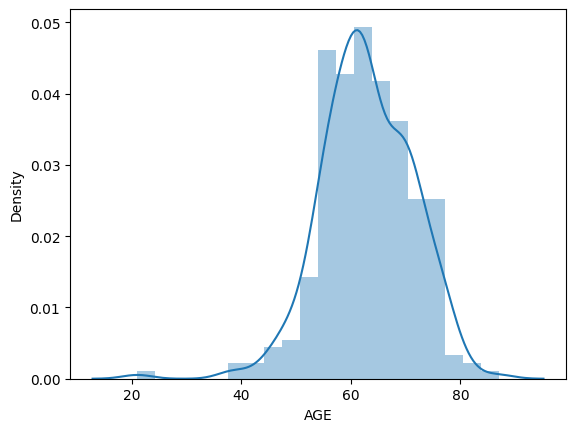

In [ ]:
# AGE Distribution
sns.distplot(df['AGE'])

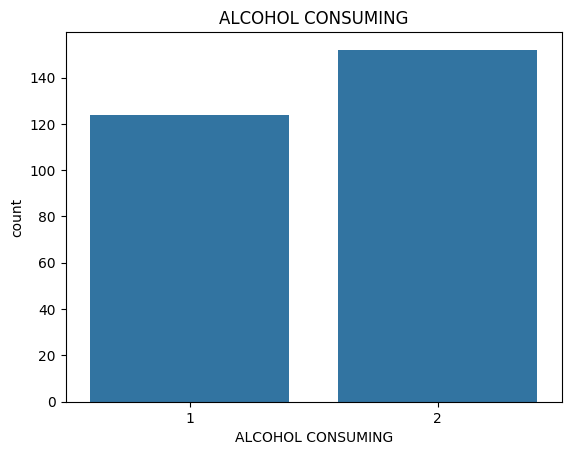

In [ ]:
sns.countplot(x=df['ALCOHOL CONSUMING'])
plt.title('ALCOHOL CONSUMING');

Based on the common encoding used in similar datasets and the distribution you observed, it's highly probable that:

    1 represents 'No' or 'Does not consume alcohol'
    2 represents 'Yes' or 'Consumes alcohol'


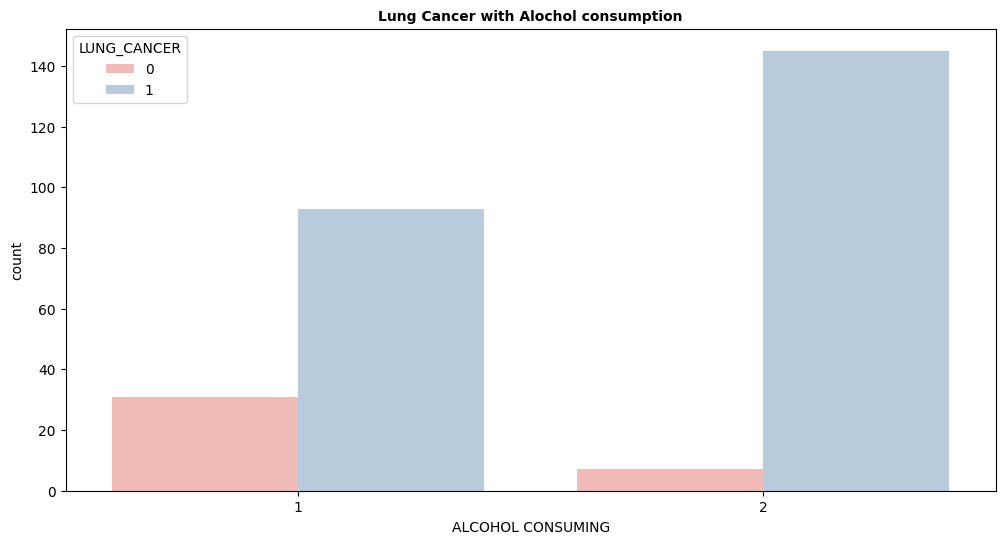

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='ALCOHOL CONSUMING',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Lung Cancer with Alochol consumption",fontweight="bold", size=10)
plt.show()


In the context of the plot showing "Lung Cancer with Alcohol Consumption" (cell WLMc_8a2604_), here's what 1 and 2 mean:

    For the "ALCOHOL CONSUMING" axis:
        1 means 'No' or 'Does not consume alcohol'.
        2 means 'Yes' or 'Consumes alcohol'. This was based on the likely encoding we discussed earlier.
    For the "LUNG_CANCER" hue (the different colored bars within each alcohol consumption group):
        0 means the patient does not have lung cancer.
        1 means the patient has lung cancer. This is based on how you replaced the 'YES' and 'NO' values in the 'LUNG_CANCER' column with 1 and 0 in cell RaLm_78Y0DXl.

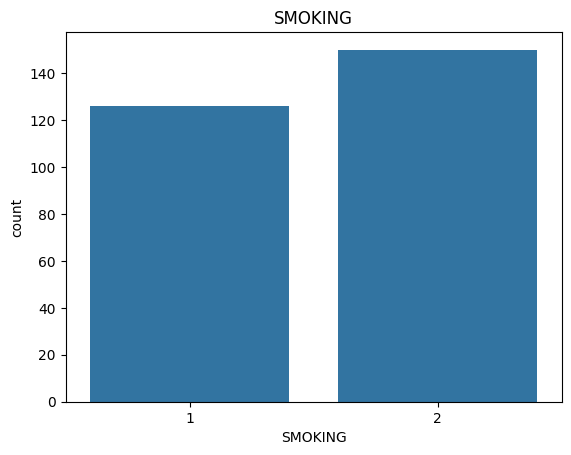

In [ ]:
sns.countplot(x=df['SMOKING'])
plt.title('SMOKING');


    1 means 'No' or 'Does not smoke'
    2 means 'Yes' or 'Smokes'


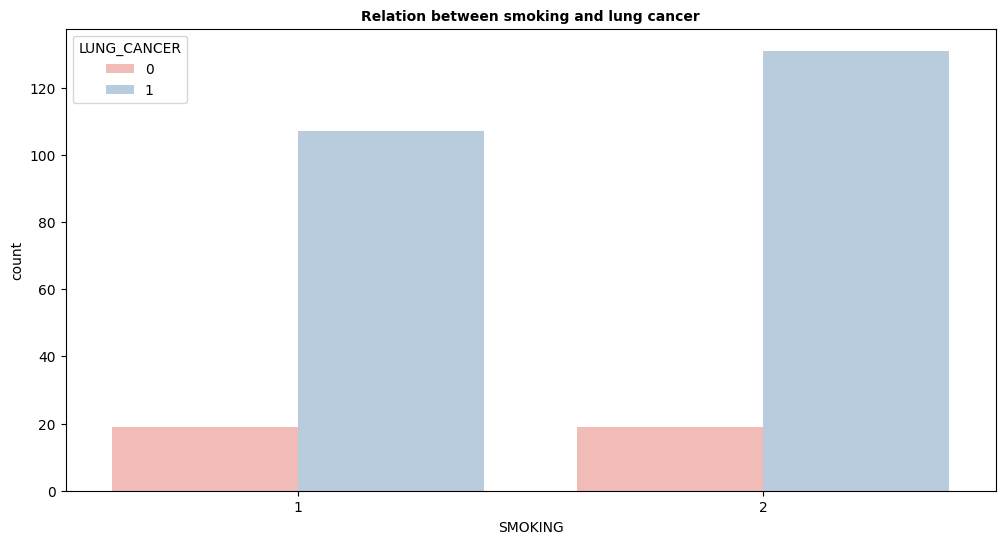

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='SMOKING',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Relation between smoking and lung cancer",fontweight="bold", size=10)
plt.show()


In the plot showing the "Relation between smoking and lung cancer" (cell n7ZcjrEu69Zx), the numbers 0, 1, and 2 represent different categories from the columns used in the plot:

    For the 'SMOKING' axis:
        1 means 'No' or 'Does not smoke'.
        2 means 'Yes' or 'Smokes'. (As we discussed based on common data encoding.)
    For the 'LUNG_CANCER' hue (the different colored bars):
        0 means the patient does not have lung cancer.
        1 means the patient has lung cancer. (As you defined in cell RaLm_78Y0DXl when you replaced 'NO' with 0 and 'YES' with 1).

So, in this plot, 0 specifically refers to not having lung cancer, while 1 and 2 refer to different smoking statuses

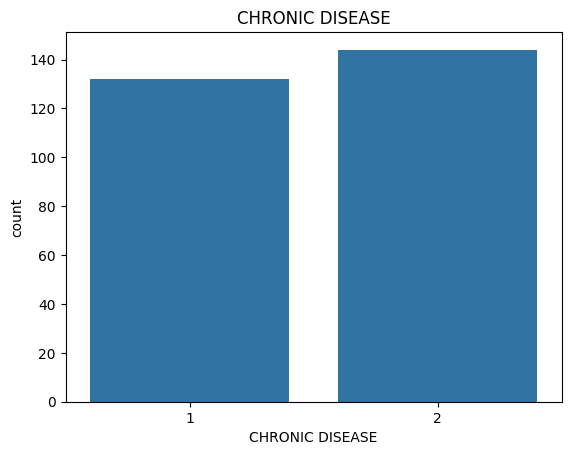

In [ ]:
sns.countplot(x=df['CHRONIC DISEASE'])
plt.title('CHRONIC DISEASE');

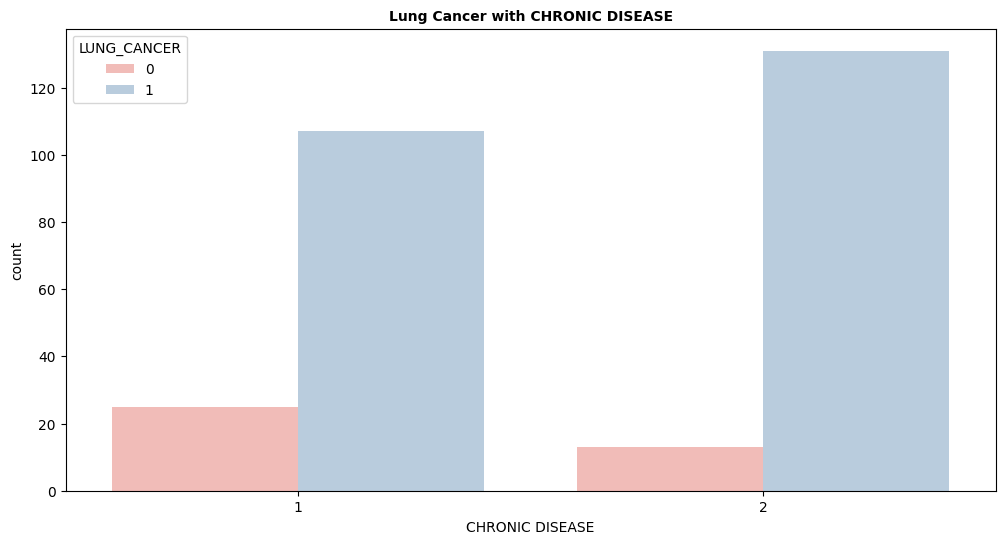

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='CHRONIC DISEASE',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Lung Cancer with CHRONIC DISEASE",fontweight="bold", size=10)
plt.show()



    For the 'CHRONIC DISEASE' axis:
        Based on the pattern observed in other binary columns in your dataset, it's highly likely that 1 means 'No' or 'Does not have a chronic disease' and 2 means 'Yes' or 'Has a chronic disease'.
    For the 'LUNG_CANCER' hue (the different colored bars):
        As you defined in cell RaLm_78Y0DXl, 0 means the patient does not have lung cancer and 1 means the patient has lung cancer.

Therefore, in this specific plot, 0 refers to not having lung cancer, while 1 and 2 on the x-axis refer to whether or not an individual has a chronic disease.

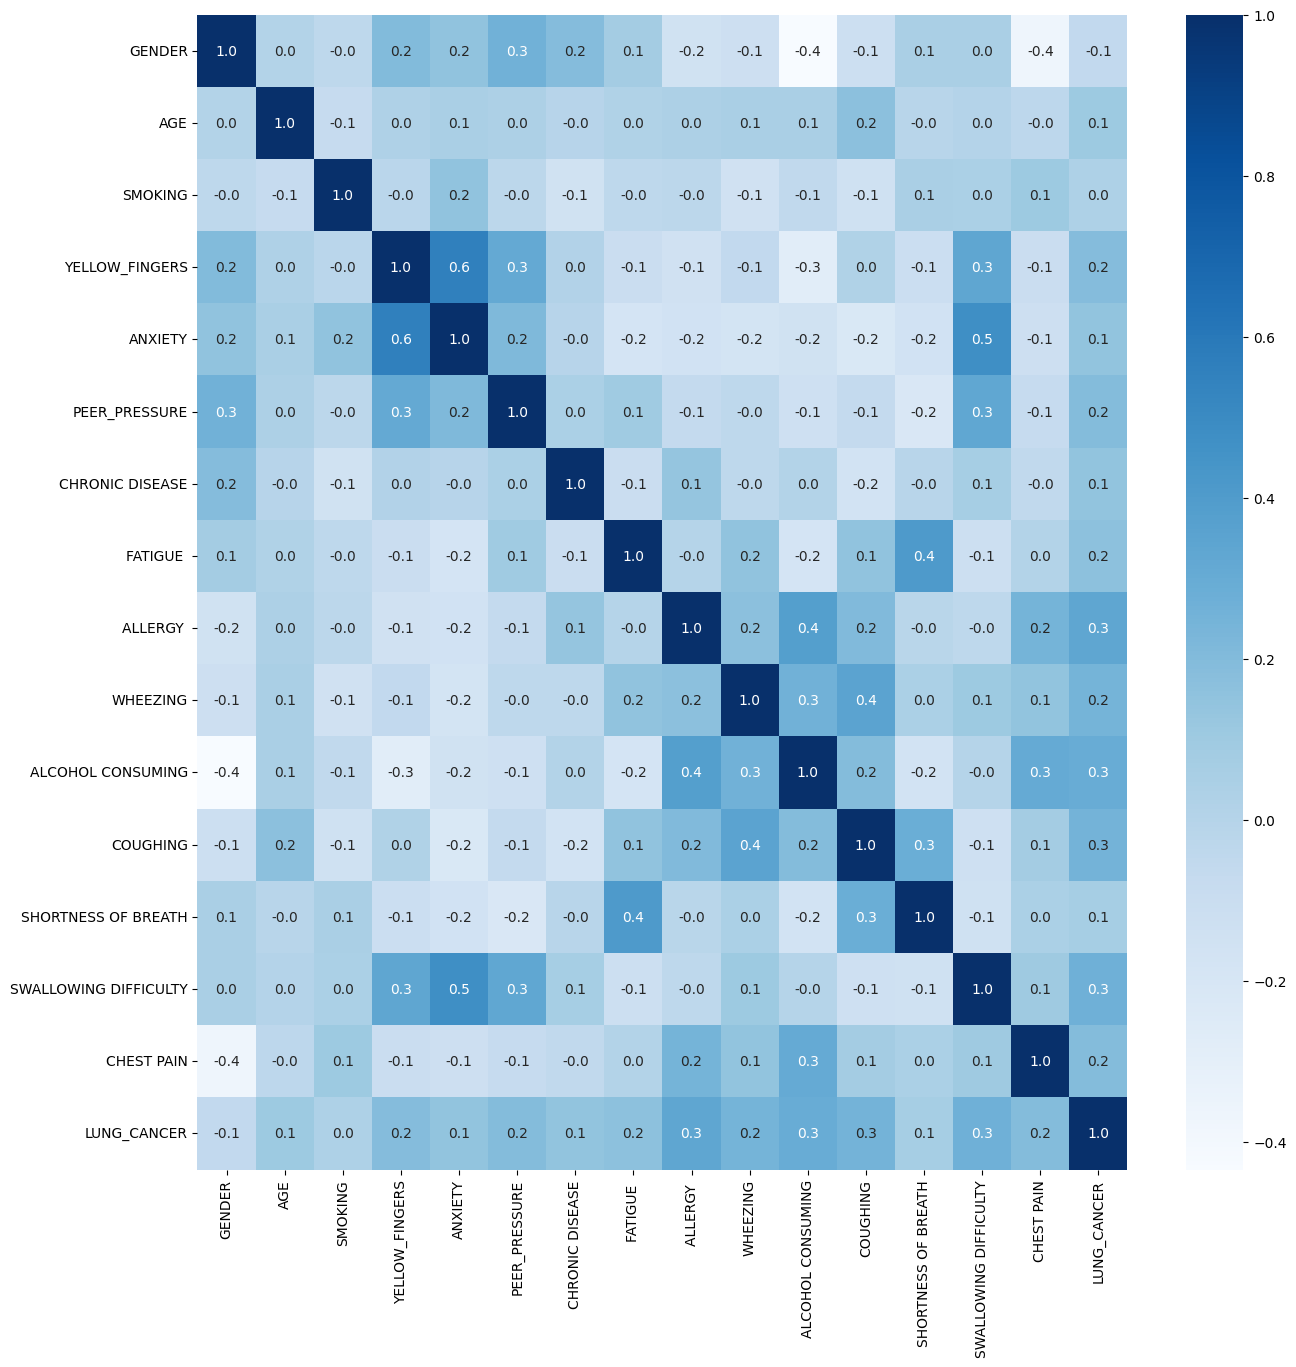

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f');

In [ ]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [ ]:
# SVM

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svc.score(X_train , y_train)

0.9318181818181818

In [ ]:
svc_pred = svc.predict(X_test)
svc_acc=accuracy_score(y_test , svc_pred)
svc_acc

0.9285714285714286

In [ ]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



Text(95.72222222222221, 0.5, 'Truh')

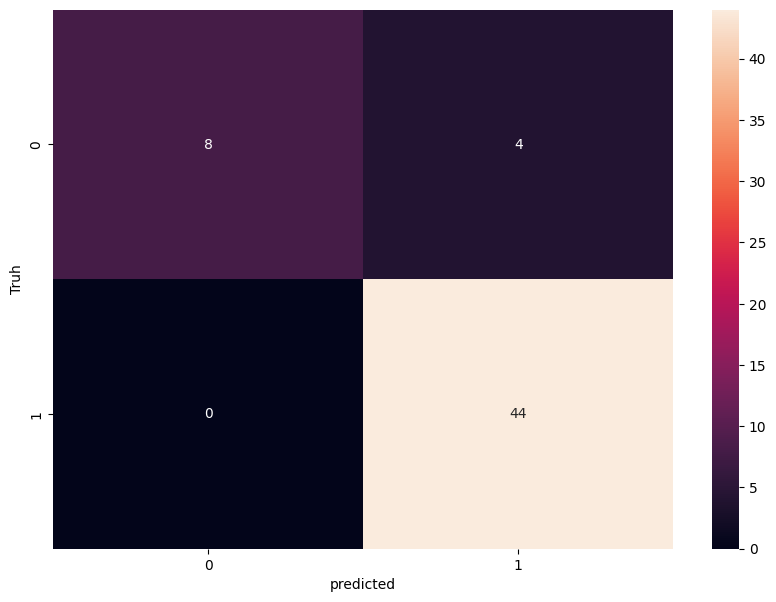

In [ ]:
cm1 = confusion_matrix(y_test,svc_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

In [ ]:
# Random Forest

In [ ]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
RF_model.score(X_train , y_train)

1.0

In [ ]:
RF_pred =RF_model.predict(X_test)
RF_acc=accuracy_score(y_test , RF_pred)
RF_acc

0.8571428571428571

In [ ]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56



Text(95.72222222222221, 0.5, 'Truh')

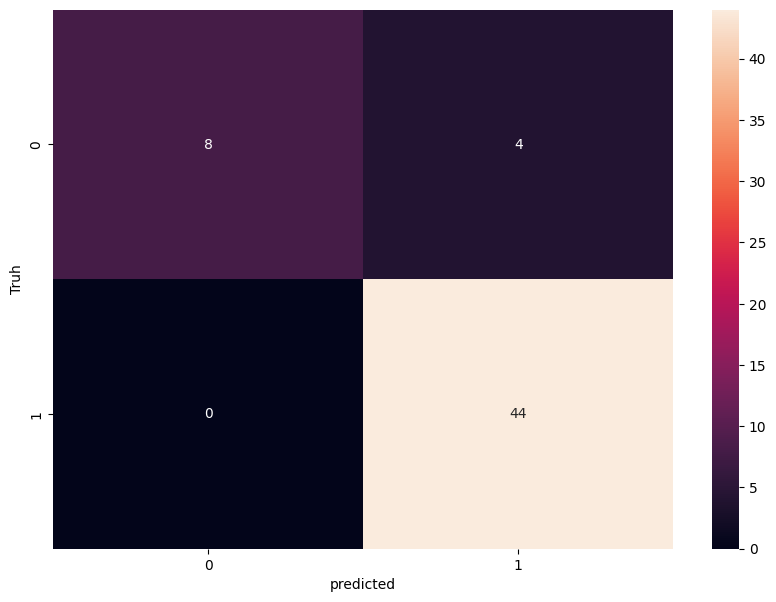

In [ ]:
cm2 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

In [ ]:
# Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_train , y_train)

1.0

In [ ]:
dt_pred = dt.predict(X_test)

In [ ]:
DT_acc=accuracy_score(y_test , dt_pred)
DT_acc

0.8928571428571429

In [ ]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.90      0.98      0.93        44

    accuracy                           0.89        56
   macro avg       0.89      0.78      0.82        56
weighted avg       0.89      0.89      0.88        56



Text(95.72222222222221, 0.5, 'Truth')

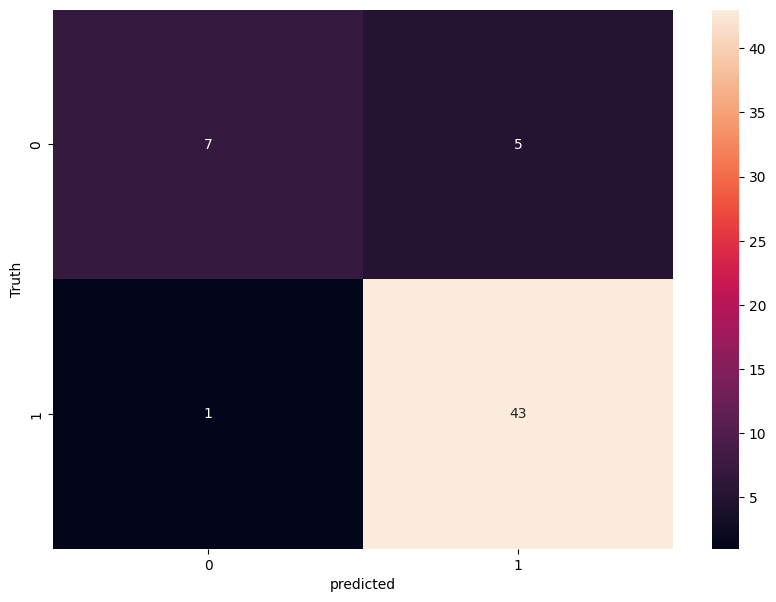

In [ ]:
cm3 = confusion_matrix(y_test,dt_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
# Models scores

In [ ]:
models=pd.DataFrame({
    'models':['Random_forest','SVC','Decsion_Treee'],
    'scores':[RF_acc,svc_acc,DT_acc]})
models.sort_values(by='scores',ascending=True)

,models,scores
0,Random_forest,0.857143
2,Decsion_Treee,0.892857
1,SVC,0.928571
